## 3차 과제 - 당뇨병을 예측해보자
- 주제: 데이터 분석 실습(머신러닝)
- 데이터: 피마 인디언 당뇨병 데이터
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
- 사용 라이브러리: numpy, pandas, matplotlib, sklearn


### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, sklearn(train_test_split, accurarcy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, StandardScaler, LogisticRegression)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

1.2 데이터를 불러오고 타겟 변수('Outcome')에 속한 값들의 비율과(value_counts 활용) 전체 데이터 앞 7개 값을 확인하세요.

In [2]:
data = pd.read_csv('diabetes.csv')

In [4]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
data.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


1.3 데이터의 feature 타입과 Null 개수를 확인하세요.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

1.4 예측을 위해 데이터를 feature 데이터 셋과 target 데이터 셋으로 나누세요.

In [15]:
X=data.drop(columns=['Outcome'])
y=data['Outcome']

1.5 X와 y로 나눈 데이터 셋을 다시 train, test로 나누세요(test_size = 0.3, random_state=123, stratify=y).

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

1.6 test size는 어느정도로 해야 좋은지 그리고 왜 그래야 하는지 작성하세요.

**일반적으로 train, test 분할은 대게7:3 혹은 8:2 정도로 학습을 시켜야한다고 알려져 있으나 데이터의 수에 따라서 결정하면 될 것 같다.**

**일례로, 빅데이터와 딥러닝에서는 굳이 일반적인 방식을 따르지 않아도 된다는 의견이 있다.**

1.7 startify 값을 설정하는 이유와 언제 주로 사용되는지 서술하세요.

**데이터의 비율을 지정해주는 함수로 데이터의 불균형이나 편향을 처리할때 사용된다. **



### 2. 예측 및 분석

2.1 성능 평가에 사용될 함수를 만들어보겠습니다. accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score로 구성되어 있으며 이를 한번에 출력할 수 있도록 합니다.

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬,\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

2. 위에서 사용한 성능지표인 Confusion Matrix에 대해 설명하세요.

**분류 모델의 성능을 평가하는 데 사용되며, TP, FP, FN, TN 으로 구성되어 있다.**

* True Positives (TP): 모델이 올바르게 양성 클래스로 예측

* True Negatives (TN): 모델이 올바르게 음성 클래스로 예측

* False Positives (FP): 모델이 양성 클래스로 잘못 예측(실제로는 음성 클래스인데 양성 클래스로 예측 (오류: Type I))

* False Negatives (FN): 모델이 음성 클래스로 잘못 예측(실제로는 양성 클래스인데 음성 클래스로 예측한 경우입니다. (오류: Type II))

2.2 로지스틱 회귀로 예측 후 위에서 만든 clf_eval() 함수를 통해 잘 예측했는지 확인하세요(solver='linear'로 설정, 예측 변수명은 pred, pred_proba).

In [51]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)[:,1]

clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[83 16]
 [21 34]]
정확도: 0.7597, 정밀도: 0.6800, 재현율: 0.618182, F1: 0.6476, AUC:0.8193


2.3 LogisticRegression에서 solver 파라미터의 역할과 어떤 것들이 있고 각각은 무엇을 의미하는지 작성하세요.

* liblinear: 경사하강법과 유사하나 한번에 하나의 파라미터를 업데이트함

* newton-cg: Newton-Raphson 방법으로 2차 도함수를 계산하여 여러번의 업데이트를 통해 비용함수를 최소하하는 파라미터 값을 찾는 방법

* lbfgs: 뉴튼-랩슨 방법을 변형한 방법으로 2차 도함수 근사치를 계산하여 속도를 개선한 방법


* sag: Stochastic Average Gradient descent로 경사 하강법을 이용하여 업데이트 이전 경사값을 현재 업데이트에 사용하는 방법

* saga: 'sag'의 개선된 방법으로 대규모 데이터 셋에 적합하며, L1 정규화를 지원함

2.4 pred와 pred_proba는 각각 어떤 차이가 있는지 작성하세요.

**pred는 타겟 변수에 대한 예측 값, pred_proba는 타겟 변수의 값에 대한 예측 확률이라 볼 수 있다.**

2.5 전체 데이터 중 약 65%가 Negative이므로 재현율 성능에 조첨을 맞추겠습니다. 정밀도 재현율 curve를 보고 임계값 별 정밀도 재현율 값의 변화를 확인하기 위해 이를 위한 함수를 작성하겠습니다.

In [25]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    #threshold 값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    #X축, y축 label과 legend, grid 설정
    ### 직접 작성(xlabel - 'Threshold value', ylabel = 'Precision and Recall value'), legend, grid는 default값으로
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

2.6 작성한 함수를 바탕으로 임계값 별 정밀도와 재현율 값 변화를 확인하세요.

In [28]:
from sklearn.metrics import precision_recall_curve

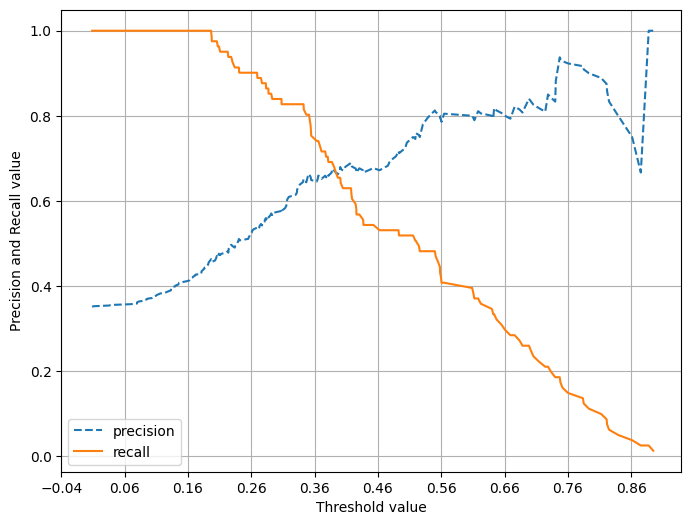

In [30]:
pred_proba_c1 = model.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

2.7 그래프를 통해 확인했을 때 Threshold를 0.38정도로 설정했을 때 recall과 precision이 어느정도 균형이 맞음을 알 수 있습니다. 그러나 두 지표 모두 0.7 이하로 낮은 값이기에 다시 확인하도록 하겠습니다. 먼저 describe() 함수를 통해 개별 feature에 대한 분포도를 확인하세요.

In [31]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2.8 위에서 확인해봤을 때 min 값이 0으로 되어 있는 feature가 다수 존재합니다. Glucose(포도당 수치), BMI 지수가 0인 것은 말이 안 되므로 이들을 평균값으로 대체하세요.

In [32]:
### Glucose, BloodPressure, SkinThickness, Insulin, BMI에 대해 평균값으로 대체
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_replace:
    data[col].replace(0, data[col].mean(), inplace=True)

In [33]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2.9 이후 대체한 feature들에 대해 feature scaling을 진행하겠습니다. 모두 numeric feature이므로 X에 대해 StandardScaler를 일괄 적용하세요.

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

2.10 feature scaling은 왜 사용하고 어떤 것들이 있는지 작성하세요.

**각 Feature가 동일한 스케일을 갖도록 데이터를 변환하는 것으로, 위 코드는 '표준화'를 사용한 코드이다.**

**표준화는 평균과 표준편차가 0, 1인 분초로 변환하는 기법이다.**

2.11 다시 에측하기에 앞서 위에서 scaling을 통해 변경된 X_scaled를 활용해 다시 train_test_split을 진행하세요(함수 파라미터 동일).

In [36]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123, stratify=y)

2.12 로지스틱 회귀로 앞서 진행한 것과 동일하게 진행하세요.

In [62]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(solver='liblinear')
lr.fit(X_scaled_train,y_train)
pred = lr.predict(X_scaled_test)
pred_proba = lr.predict_proba(X_scaled_test)[:,1]

clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[79 20]
 [18 37]]
정확도: 0.7532, 정밀도: 0.6491, 재현율: 0.672727, F1: 0.6607, AUC:0.8145


### 3. 자유 분석
성능을 높일 수 있는 방법들을 활용해 예측을 진행하세요.

**Random Forest**

In [37]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [93]:
# Random Forest 모델 훈련
###scaled에 대한 결과값 비교
##1. scaled:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_scaled_train, y_train)

# 예측
y_pred = model.predict(X_scaled_test)
pred_proba = model.predict_proba(X_scaled_test)[:,1]

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
clf_eval(y_test, y_pred, pred_proba)

Accuracy: 0.7445887445887446
오차 행렬,
 [[125  25]
 [ 34  47]]
정확도: 0.7446, 정밀도: 0.6528, 재현율: 0.580247, F1: 0.6144, AUC:0.8352


In [94]:
##2. scaled X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

# 정확도 평가
clf_eval(y_test, y_pred, pred_proba)

오차 행렬,
 [[126  24]
 [ 33  48]]
정확도: 0.7532, 정밀도: 0.6667, 재현율: 0.592593, F1: 0.6275, AUC:0.8388


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

clf_eval(y_test, y_pred, pred_proba)

오차 행렬,
 [[126  24]
 [ 33  48]]
정확도: 0.7532, 정밀도: 0.6667, 재현율: 0.592593, F1: 0.6275, AUC:0.8388


In [97]:
###train,test 비율에 따른 비교
##2. 0.2비율
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_scaled_train, y_train)

# 예측
y_pred = model.predict(X_scaled_test)
pred_proba = model.predict_proba(X_scaled_test)[:,1]

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
clf_eval(y_test, y_pred, pred_proba)

Accuracy: 0.7857142857142857
오차 행렬,
 [[88 12]
 [21 33]]
정확도: 0.7857, 정밀도: 0.7333, 재현율: 0.611111, F1: 0.6667, AUC:0.8474


In [98]:
##3. 0.15비율
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=123, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_scaled_train, y_train)

# 예측
y_pred = model.predict(X_scaled_test)
pred_proba = model.predict_proba(X_scaled_test)[:,1]

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
clf_eval(y_test, y_pred, pred_proba)

Accuracy: 0.8103448275862069
오차 행렬,
 [[69  7]
 [15 25]]
정확도: 0.8103, 정밀도: 0.7812, 재현율: 0.625000, F1: 0.6944, AUC:0.8433


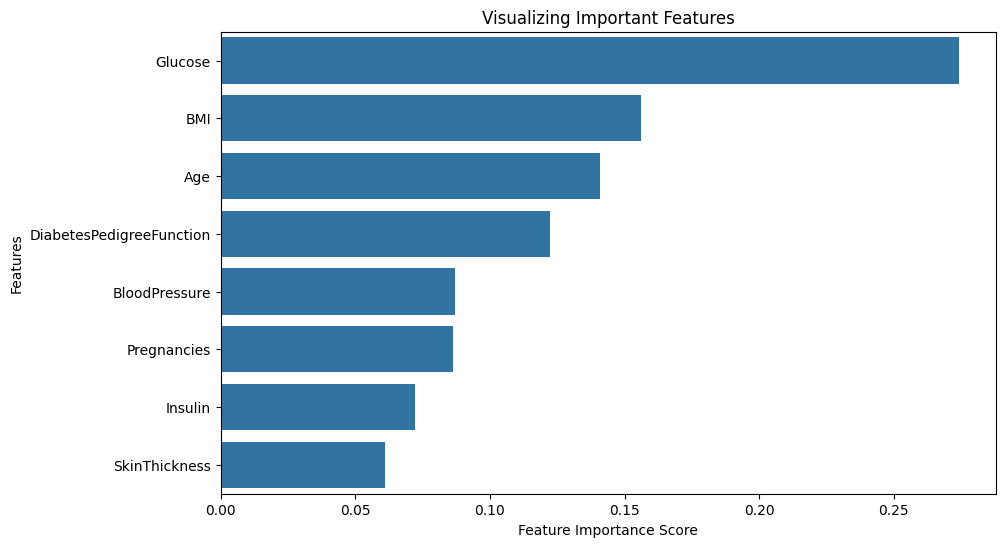


Feature Importance Scores:
Glucose                     0.274024
BMI                         0.156150
Age                         0.140806
DiabetesPedigreeFunction    0.122153
BloodPressure               0.087219
Pregnancies                 0.086363
Insulin                     0.072284
SkinThickness               0.061002
dtype: float64


In [44]:
# 특성 중요도 시각화
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# 각 특성의 중요도 출력
print("\nFeature Importance Scores:")
print(feature_importances)

**XGBoost**

In [40]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
# XGBoost 모델 훈련
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6810344827586207


In [49]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 훈련
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)    #xgboost는 0.2 분할이 더 좋다.
print("Accuracy:", accuracy)

Accuracy: 0.7077922077922078


In [48]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# XGBoost 모델 훈련
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)    #0.3 분할과 같은 결과
print("Accuracy:", accuracy)

Accuracy: 0.6810344827586207


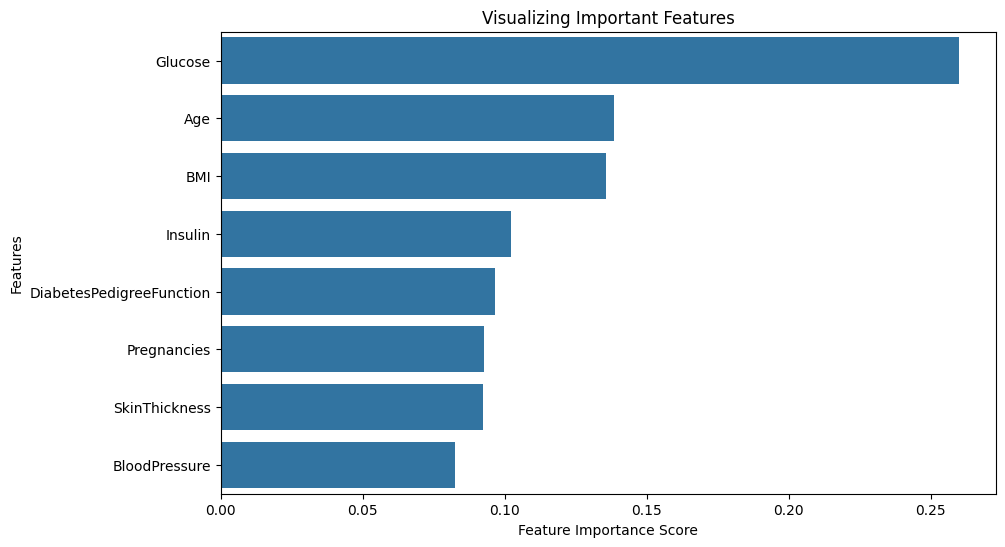


Feature Importance Scores:
Glucose                     0.259786
Age                         0.138610
BMI                         0.135555
Insulin                     0.102135
DiabetesPedigreeFunction    0.096436
Pregnancies                 0.092735
SkinThickness               0.092384
BloodPressure               0.082359
dtype: float32


In [50]:
# 특성 중요도 시각화
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# 각 특성의 중요도 출력
print("\nFeature Importance Scores:")
print(feature_importances)